In [3]:
import zipfile
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [4]:
# Corrected dataset path (no space)
dataset_path = '/content/drive/MyDrive/DS_PROJECT/DS_PROJECT/SolarGuard/dataset'

In [5]:
import zipfile
import os

zip_paths = [
    f'{dataset_path}/Bird-drop-20250428T115508Z-1-001.zip',
    f'{dataset_path}/Clean-20250428T115502Z-1-001.zip',
    f'{dataset_path}/Dusty-20250428T115457Z-1-001.zip',
    f'{dataset_path}/Electrical-damage-20250428T115452Z-1-001.zip',
    f'{dataset_path}/Physical-Damage-20250428T115448Z-1-001.zip',
    f'{dataset_path}/Snow-Covered-20250428T115440Z-1-001.zip',
]

for zip_file in zip_paths:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(dataset_path)
        image_files = [f for f in zip_ref.namelist() if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"{zip_file.split('/')[-1]} → {len(image_files)} image(s)")

Bird-drop-20250428T115508Z-1-001.zip → 207 image(s)
Clean-20250428T115502Z-1-001.zip → 193 image(s)
Dusty-20250428T115457Z-1-001.zip → 190 image(s)
Electrical-damage-20250428T115452Z-1-001.zip → 103 image(s)
Physical-Damage-20250428T115448Z-1-001.zip → 69 image(s)
Snow-Covered-20250428T115440Z-1-001.zip → 123 image(s)


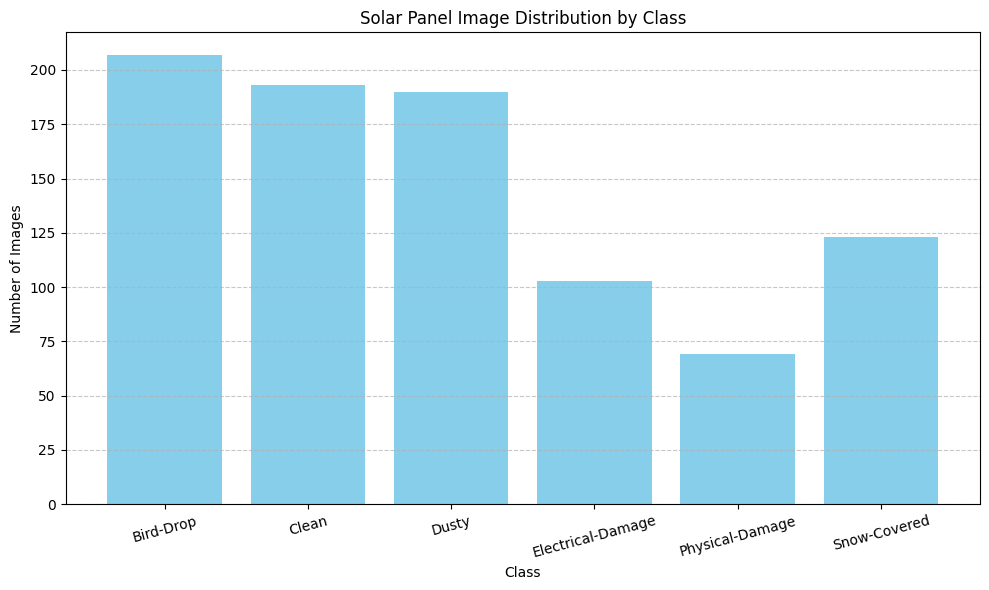

In [6]:
import matplotlib.pyplot as plt

class_counts = {
    'Bird-Drop': 207,
    'Clean': 193,
    'Dusty': 190,
    'Electrical-Damage': 103,
    'Physical-Damage': 69,
    'Snow-Covered': 123
}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Solar Panel Image Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

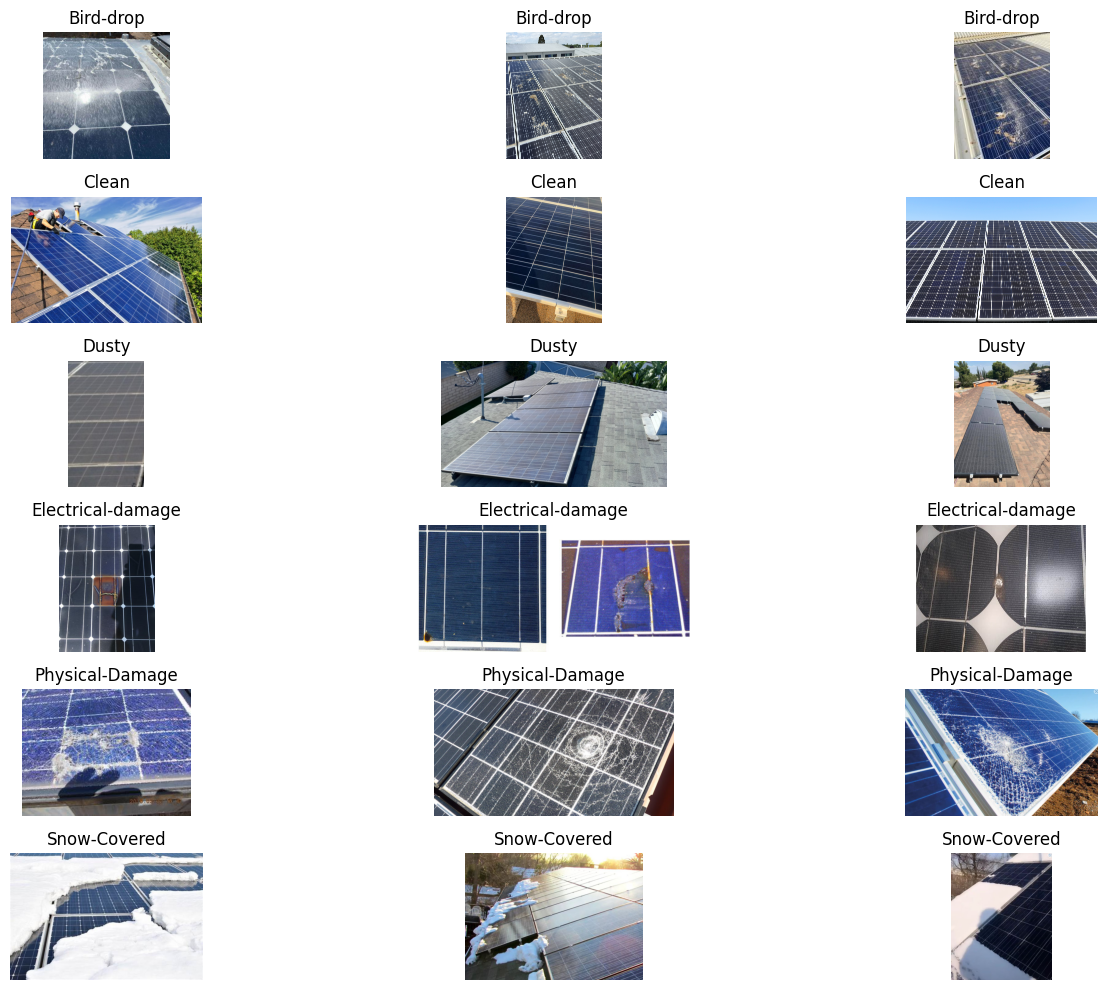

In [14]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/DS_PROJECT/DS_PROJECT/SolarGuard/dataset'
valid_exts = ['.jpg', '.jpeg', '.png']
classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]

plt.figure(figsize=(15, 10))
i = 1

for label in classes:
    folder = os.path.join(dataset_path, label)

    images = [f for f in os.listdir(folder) if os.path.splitext(f)[1].lower() in valid_exts]
    sample_images = random.sample(images, min(3, len(images)))
    for img_file in sample_images:
        img_path = os.path.join(folder, img_file)
        try:
            img = Image.open(img_path)
            plt.subplot(len(classes), 3, i)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
            i += 1
        except Exception as e:
            print(f"Skipped: {img_path} due to error: {e}")

plt.tight_layout()
plt.show()

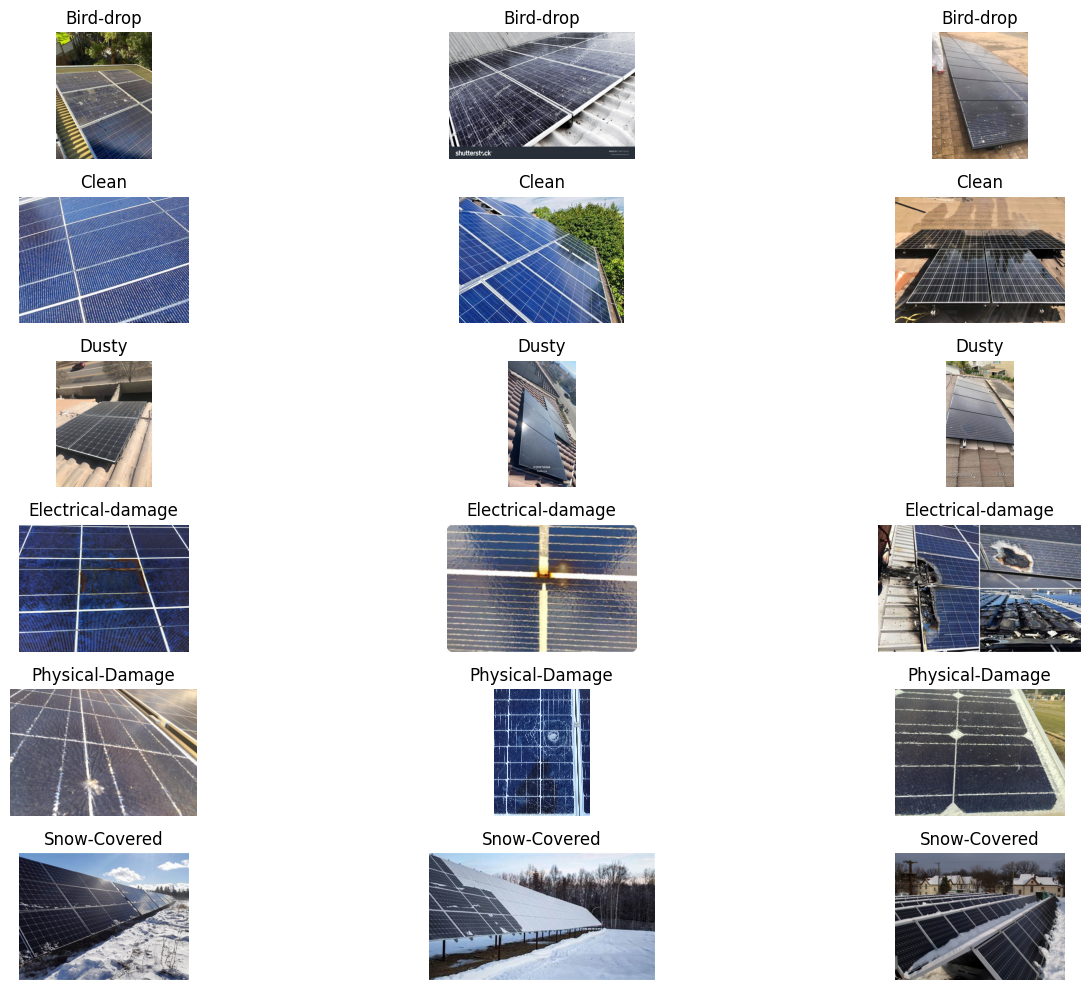

In [16]:

import os
import random
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/content/drive/MyDrive/DS_PROJECT/DS_PROJECT/SolarGuard/dataset'
valid_exts = ['.jpg', '.jpeg', '.png']
classes = [cls for cls in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, cls))]

plt.figure(figsize=(15, 10))
i = 1

for label in classes:
    folder = os.path.join(dataset_path, label)
    all_images = [img for img in os.listdir(folder) if os.path.splitext(img)[1].lower() in valid_exts]
    sample_images = random.sample(all_images, min(3, len(all_images)))  # Avoid error if < 3 images

    for img_file in sample_images:
        img_path = os.path.join(folder, img_file)
        try:
            img = Image.open(img_path).convert("RGB")
            plt.subplot(len(classes), 3, i)
            plt.imshow(img)
            plt.title(label)
            plt.axis('off')
            i += 1
        except Exception as e:
            print(f"Skipped {img_path} due to error: {e}")

plt.tight_layout()
plt.show()
